<a href="https://colab.research.google.com/github/z-tufekci/DeepLearning/blob/main/FinRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTALL FinRL Pack and IMPORT libs

## Install Packages

In [1]:
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-azeyr5tp
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-azeyr5tp
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-y5vuc_94/pyfolio_a1b913c5d8744cc6897f5852ca87ce9d
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-y5vuc_94/pyfolio_a1b913c5d8744cc6897f5852ca87ce9d
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-y5vuc_94/elegantrl_a7220b3fd76540aab73912ced31fac9a
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-y5vuc_94/elegantrl_a7220b3fd76540aab73912ced31fac9a
     |████████████████████████████████| 73 kB 2.4 MB/s 
     |████████████████████████████████| 174 kB 30.9 MB/s 
     |████████████████████████████████| 57.6 MB 1.3 MB/s 
     |████████████████████████████████| 1.8 MB 38.1 MB/s 
     |██████

In [2]:
!pip install git+https://github.com/AI4Finance-Foundation/FinRL-Meta.git

  Cloning https://github.com/AI4Finance-Foundation/FinRL-Meta.git to /tmp/pip-req-build-yfr7erex
  Running command git clone -q https://github.com/AI4Finance-Foundation/FinRL-Meta.git /tmp/pip-req-build-yfr7erex
  Created wheel for finrl-meta: filename=finrl_meta-0.3.0-py3-none-any.whl size=2126 sha256=56fc9406d624a3169cb0081dbfebb340a66660a58a341e466be96fffa11ecfb0
  Stored in directory: /tmp/pip-ephem-wheel-cache-o4_ninlz/wheels/88/2a/01/fce5163dc3b169500d2da0c63c417f0aa6e62664860e782ea8
Successfully built finrl-meta


## Import FinRL libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.apps import config

#from finrl.finrl_meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.finrl_meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.finrl_meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.drl_agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


## Import Stock time series and technical Indicators

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [84]:
#del df
filenames = ['INTC'] # 'AXP','AAPL', 'AMGN','BA','CAT','CSCO','CVX','DIS','GS','HD','HON','IBM','INTC','JNC','JPM', 'KO', 'MCD','MMM','MRK','MSFT','NKE','PG','TRV','UNH','VZ','WBA','WMT'
df_temps = []
for fn in filenames :
    df_temp = pd.read_csv('gdrive/My Drive/DeepLearning/'+fn+'.csv', sep=';')
    df_temp = df_temp.iloc[33:, 0:9]
    df_temp['tic'] = fn
    df_temps.append(df_temp)
df = pd.concat(df_temps, ignore_index=True)

## PROCESS DATA

In [85]:
print(df.head())
print(df.shape)

         Date    Close          RSI  TNRSI  ...      SO     CCI     PPO   tic
0  20.10.2000  43,0625  55,74572127  67,74  ...  116,04   77,47  -12,75  INTC
1  23.10.2000  43,3125  55,85365854   61,5  ...  103,25   91,69  -11,33  INTC
2  24.10.2000       42           50  47,93  ...   83,46    54,7  -10,35  INTC
3  25.10.2000  41,3125  50,62656642  44,78  ...    74,8   39,57   -9,58  INTC
4  26.10.2000  44,6875  58,71559633  50,61  ...  117,32  151,82   -8,24  INTC

[5 rows x 10 columns]
(4999, 10)


CHANGE TO DATETIME OBJECT

In [86]:
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%d.%m.%Y") )
df.head()

,Date,Close,RSI,TNRSI,BB PERCENT,ROC-14,SO,CCI,PPO,tic
0,2000-10-20,"43,0625","55,74572127","67,74","74,07852043","7,320872274","116,04","77,47","-12,75",INTC
1,2000-10-23,"43,3125","55,85365854","61,5","78,54917824","7,441860465","103,25","91,69","-11,33",INTC
2,2000-10-24,42,50,"47,93","67,66306171",0,"83,46","54,7","-10,35",INTC
3,2000-10-25,"41,3125","50,62656642","44,78","63,06931391","0,762195122","74,8","39,57","-9,58",INTC
4,2000-10-26,"44,6875","58,71559633","50,61","95,22013013","11,89358372","117,32","151,82","-8,24",INTC


SORT BY DATE

In [87]:
df = df.sort_values(by=['Date','tic'], ignore_index=True)
df.head()

,Date,Close,RSI,TNRSI,BB PERCENT,ROC-14,SO,CCI,PPO,tic
0,2000-10-20,"43,0625","55,74572127","67,74","74,07852043","7,320872274","116,04","77,47","-12,75",INTC
1,2000-10-23,"43,3125","55,85365854","61,5","78,54917824","7,441860465","103,25","91,69","-11,33",INTC
2,2000-10-24,42,50,"47,93","67,66306171",0,"83,46","54,7","-10,35",INTC
3,2000-10-25,"41,3125","50,62656642","44,78","63,06931391","0,762195122","74,8","39,57","-9,58",INTC
4,2000-10-26,"44,6875","58,71559633","50,61","95,22013013","11,89358372","117,32","151,82","-8,24",INTC


In [88]:
df.rename(columns={'Close': 'close'}, inplace=True)
df.rename(columns={'Date': 'date'}, inplace=True)
df['close'] = df['close'].apply(lambda x: float(x.replace(",", ".")))
df['RSI'] = df['RSI'].apply(lambda x: float(x.replace(",", ".")))
df['TNRSI'] = df['TNRSI'].apply(lambda x: float(x.replace(",", ".")))
df['BB PERCENT'] = df['BB PERCENT'].apply(lambda x: float(x.replace(",", ".")))
df['ROC-14'] = df['ROC-14'].apply(lambda x: float(x.replace(",", ".")))
df['SO'] = df['SO'].apply(lambda x: float(x.replace(",", ".")))
df['PPO'] = df['PPO'].apply(lambda x: float(x.replace(",", ".")))
df['CCI'] = df['CCI'].apply(lambda x: float(x.replace(",", ".")))
df.head()

,date,close,RSI,TNRSI,BB PERCENT,ROC-14,SO,CCI,PPO,tic
0,2000-10-20,43.0625,55.745721,67.74,74.078520,7.320872,116.04,77.47,-12.75,INTC
1,2000-10-23,43.3125,55.853659,61.50,78.549178,7.441860,103.25,91.69,-11.33,INTC
2,2000-10-24,42.0000,50.000000,47.93,67.663062,0.000000,83.46,54.70,-10.35,INTC
3,2000-10-25,41.3125,50.626566,44.78,63.069314,0.762195,74.80,39.57,-9.58,INTC
4,2000-10-26,44.6875,58.715596,50.61,95.220130,11.893584,117.32,151.82,-8.24,INTC


SPLIT DATA AS TRAIN AND TEST

In [89]:
training = data_split(df, '2000-10-20','2016-09-15')
print(training.shape)
trading = data_split(df, '2016-09-15','2020-09-04')
print(trading.shape)

(3999, 10)
(1000, 10)


In [90]:
ratio_list = ['RSI','TNRSI','BB PERCENT','ROC-14','SO','CCI','PPO']
stock_dimension = len(training.tic.unique())
state_space = 1 + 2*stock_dimension + len(ratio_list)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

# Parameters for the environment
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 100000, 
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": ratio_list, 
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4
   
}
#Establish the training environment using StockTradingEnv() class
e_train_gym = StockTradingEnv(df = training, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()


Stock Dimension: 1, State Space: 10


# MODEL1: A2C

In [91]:
agent = DRLAgent(env = env_train)

In [92]:
model_a2c = agent.get_model("a2c")

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device


In [93]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=50000)

--------------------------------------
| time/                 |            |
|    fps                | 430        |
|    iterations         | 100        |
|    time_elapsed       | 1          |
|    total_timesteps    | 500        |
| train/                |            |
|    entropy_loss       | -1.45      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
|    n_updates          | 99         |
|    policy_loss        | 0.0019     |
|    reward             | -0.0001545 |
|    std                | 1.03       |
|    value_loss         | 4.56e-06   |
--------------------------------------
---------------------------------------
| time/                 |             |
|    fps                | 437         |
|    iterations         | 200         |
|    time_elapsed       | 2           |
|    total_timesteps    | 1000        |
| train/                |             |
|    entropy_loss       | -1.48       |
|    explained_variance | 0           |
|    learning_ra

## TEST A2C

In [94]:
e_trade_gym = StockTradingEnv(df = trading, **env_kwargs)
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_a2c, 
    environment = e_trade_gym)

hit end!


In [95]:
print(df_account_value.shape)
df_account_value.tail()

(1000, 2)


,date,account_value
995,2020-08-28,129478.451178
996,2020-08-31,130729.210593
997,2020-09-01,130353.715593
998,2020-09-02,133582.534378
999,2020-09-03,129271.407063


In [97]:
print(df_actions)

          date actions
0   2016-09-15     [0]
1   2016-09-16     [0]
2   2016-09-19     [0]
3   2016-09-20     [0]
4   2016-09-21   [100]
..         ...     ...
994 2020-08-27   [100]
995 2020-08-28   [100]
996 2020-08-31  [-100]
997 2020-09-01  [-100]
998 2020-09-02   [100]

[999 rows x 2 columns]


# MODEL2: DDPG

In [124]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


In [125]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=50000)

------------------------------------
| time/              |             |
|    episodes        | 4           |
|    fps             | 80          |
|    time_elapsed    | 199         |
|    total_timesteps | 15996       |
| train/             |             |
|    actor_loss      | 77.6        |
|    critic_loss     | 29.9        |
|    learning_rate   | 0.001       |
|    n_updates       | 11997       |
|    reward          | 0.002344531 |
------------------------------------
day: 3998, episode: 20
begin_total_asset: 100000.00
end_total_asset: 83529.19
total_reward: -16470.81
total_cost: 99.90
total_trades: 3998
Sharpe: 0.151
------------------------------------
| time/              |             |
|    episodes        | 8           |
|    fps             | 69          |
|    time_elapsed    | 462         |
|    total_timesteps | 31992       |
| train/             |             |
|    actor_loss      | 30          |
|    critic_loss     | 0.598       |
|    learning_rate   | 0.001     

## TEST DDPG

In [126]:
e_trade_gym = StockTradingEnv(df = trading, **env_kwargs)
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_ddpg, 
    environment = e_trade_gym)

hit end!


In [127]:
print(df_account_value.shape)
df_account_value.tail()

(1000, 2)


,date,account_value
995,2020-08-28,135377.643132
996,2020-08-31,136773.325816
997,2020-09-01,136343.885816
998,2020-09-02,140262.523132
999,2020-09-03,135270.280448


In [128]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df_actions)

          date actions
0   2016-09-15   [100]
1   2016-09-16   [100]
2   2016-09-19   [100]
3   2016-09-20   [100]
4   2016-09-21   [100]
..         ...     ...
994 2020-08-27     [0]
995 2020-08-28     [0]
996 2020-08-31     [0]
997 2020-09-01     [0]
998 2020-09-02     [0]

[999 rows x 2 columns]


# MODEL3: PPO

In [131]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device


In [ ]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=50000)

-----------------------------
| time/              |      |
|    fps             | 567  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
| train/             |      |
|    reward          | 0.0  |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 545          |
|    iterations           | 2            |
|    time_elapsed         | 7            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0009689309 |
|    clip_fraction        | 0.0064       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.43        |
|    explained_variance   | 1.19e-07     |
|    learning_rate        | 0.00025      |
|    loss                 | 0.00281      |
|    n_updates            | 10           |
|    policy_gradient_loss | -5.82e-05    |
|    reward               | 0.09661967   |

## TEST PPO

In [ ]:
e_trade_gym = StockTradingEnv(df = trading, **env_kwargs)
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_ppo, 
    environment = e_trade_gym)

In [ ]:
print(df_account_value.shape)
df_account_value.tail()

In [ ]:
print(df_actions)

# MODEL4: TD3

In [ ]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


In [ ]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=50000)

day: 3998, episode: 70
begin_total_asset: 100.00
end_total_asset: 100.00
total_reward: 0.00
total_cost: 0.00
total_trades: 0
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 65       |
|    time_elapsed    | 245      |
|    total_timesteps | 15996    |
| train/             |          |
|    actor_loss      | 2.38     |
|    critic_loss     | 0.00769  |
|    learning_rate   | 0.001    |
|    n_updates       | 11997    |
|    reward          | 0.0      |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 55       |
|    time_elapsed    | 581      |
|    total_timesteps | 31992    |
| train/             |          |
|    actor_loss      | 1.63     |
|    critic_loss     | 0.00157  |
|    learning_rate   | 0.001    |
|    n_updates       | 27993    |
|    reward          | 0.0      |
-------------------------

## TEST TD3

In [ ]:
e_trade_gym = StockTradingEnv(df = trading, **env_kwargs)
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_td3, 
    environment = e_trade_gym)

hit end!


In [ ]:
print(df_account_value.shape)
df_account_value.tail()

(1000, 2)


,date,account_value
995,2020-08-28,10000.0
996,2020-08-31,10000.0
997,2020-09-01,10000.0
998,2020-09-02,10000.0
999,2020-09-03,10000.0


# MODEL5: SAC

In [39]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 1000000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'batch_size': 128, 'buffer_size': 1000000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device


In [ ]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=50000)

## TEST SAC

In [ ]:
e_trade_gym = StockTradingEnv(df = trading, **env_kwargs)
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_sac, 
    environment = e_trade_gym)

In [ ]:
print(df_account_value.shape)
df_account_value.tail()

# Back Test Plot

In [129]:
print("==============Get Backtest Results===========")
perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
print("==============Get Baseline Results===========")
stats = backtest_stats(trading, value_col_name = 'close')
stats = pd.DataFrame(stats)

==============Get Backtest Results===========
Annual return          0.079103
Cumulative returns     0.352703
Annual volatility      0.346559
Sharpe ratio           0.394022
Calmar ratio           0.227028
Stability              0.723049
Max drawdown          -0.348429
Omega ratio            1.083796
Sortino ratio          0.563045
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.979560
Daily value at risk   -0.043120
dtype: float64
==============Get Baseline Results===========
Annual return          0.084210
Cumulative returns     0.378282
Annual volatility      0.347681
Sharpe ratio           0.407478
Calmar ratio           0.241652
Stability              0.722407
Max drawdown          -0.348474
Omega ratio            1.086230
Sortino ratio          0.582333
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.980913
Daily value at risk   -0.043242
dtype: float64


==============Compare to baseline buy-and-hold===========


Start date,2016-09-15
End date,2020-09-03
Total months,47
,Backtest
Annual return,7.91%
Cumulative returns,35.27%
Annual volatility,34.656%
Sharpe ratio,0.39
Calmar ratio,0.23
Stability,0.72
Max drawdown,-34.843%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.84,2020-01-24,2020-03-16,NaT,NaN
1,26.11,2019-04-22,2019-06-03,2019-11-26,157
2,25.68,2018-06-01,2018-10-24,2019-04-17,229
3,14.63,2018-01-26,2018-02-08,2018-03-06,28
4,11.90,2017-01-27,2017-07-03,2017-09-29,176


/usr/local/lib/python3.7/dist-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


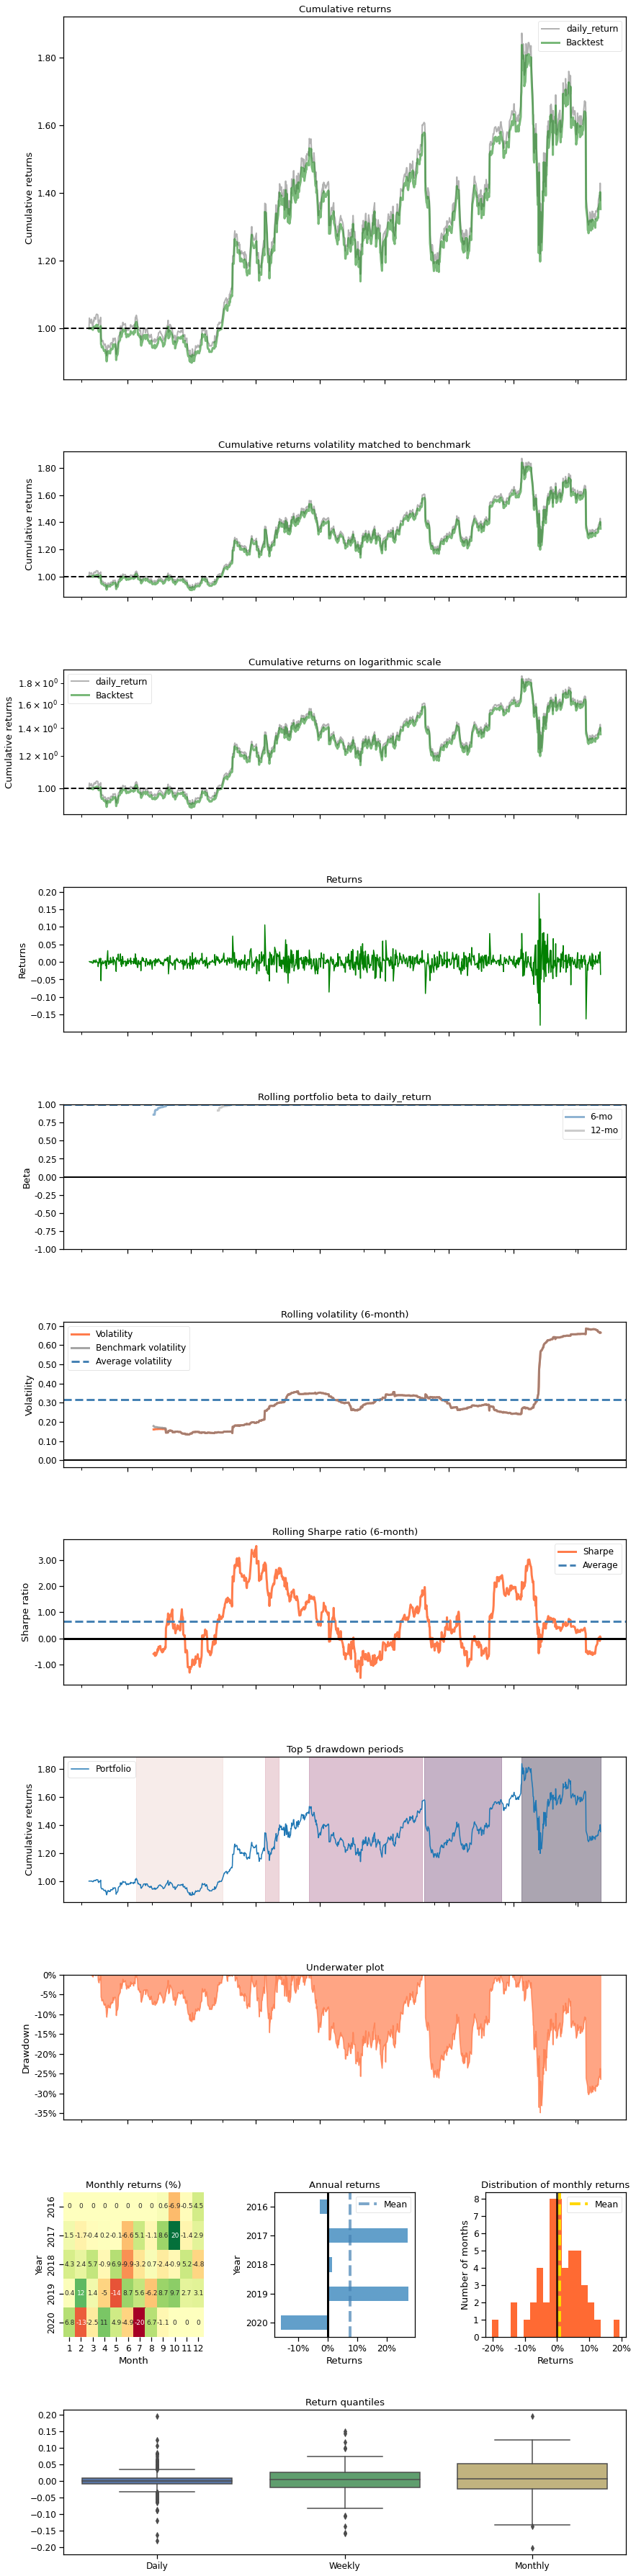

In [130]:
import pyfolio
def backtest_plot():
    baseline_returns = get_daily_return(trading, value_col_name="close") # This is current daily return 
    test_returns = get_daily_return(df_account_value) # This is our offering strategy
    with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(
            returns=test_returns, benchmark_rets=baseline_returns, set_context=False
        )
print("==============Compare to baseline buy-and-hold===========")
%matplotlib inline
backtest_plot()